# Implementation and evaluation of K-nearest neighbors (KNN) algorithm for handwritten digit recognition.
### Nina Gutzeit, Maximimilian Hingerl, Emma Kray, Johannes Müller
### July 2021

## Introduction
(...)

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from functions.Load_data import load_the_pickle
train_labels, train_values = load_the_pickle('data/train_points.p')
test_labels, test_values = load_the_pickle('data/test_points.p')

## The data set
(insert description of data here: mnist, 28x28, csv)

Below we can see how a random sample of 25 images looks:

<Figure size 720x720 with 0 Axes>

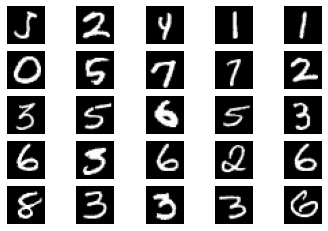

In [2]:
# loading a selection of images
fig = plt.figure(figsize=(10,10))
a = np.random.randint(0,59975)
b = a +25
fig = plt.figure()
for i in range (a,b):
    mat_data = train_values[i,:].reshape(28,28)
    fig.add_subplot(5, 5, i-a+1)
    plt.imshow(mat_data, cmap = 'gray')
    plt.axis('off')

plt.show()

## Data cleaning
The first step when dealing with such a data set is to check for errors or irregularities. Unexpected values such as NA values or outliers with intensity values outside of the range(0, 256) need to be dealt with. Possible solutions are removing the affected images or imputation of the individual values.   
There are no unusual entries:

In [ ]:
# checking for NA and range


## Standardization
For PCA and kNN the data needs to be standardized. Standardization can refer to different operations. We implemented centering: $ (X_i - \overline{X}) $ and Z-transformation: $\dfrac{(X_i - \overline{X})} {\sigma _ {i}} $. The mean and standard deviation are calculated on the training data set. Covariance is calculated by:   
  
  
$$\text{cov}(x,y) = \frac{1}{N - 1} \cdot \sum_{i=1}^{N} \left(X_i - \overline{X}\right)\left(Y_i - \overline{Y}\right)$$     
  
Where x and y are different pixel positions aka columns of the dataset. A covariance function therefore gives a centered data matrix that can be used in PCA. 

```python
    # Averages taken from second (training) array
    avg = np.mean(X2, axis=1)
    # unweighted, axis=1 means mean calculated over rows

    # N-1 calculated:
    N_1 = X.shape[1] - 1

    # Averages subtracted:
    X = X - avg[:, None]
    # None adds another dimension so that subtraction is row-wise

    # Skalarprodukt
    X_T = X.T
    c = np.dot(X, X_T)

    # Multiplied by 1/(N-1)
    c = c * np.true_divide(1, N_1)
```
PCA needs a correlation/ covariance function as an input. 

## The knn algorithm
### distance methods
The knn algorithm classifies our test-dataset based on the distances between a single test-datapoint and all points of the training dataset. These distances are then being sorted by
size and the k smallest distances are selected. We then take a look at the labels of these k nearest neighbours and decides based on the major vote which label fits best for the tested data point.
There are many different ways to calculate distances, we tested two methods: The euclidean and the manhattan distance. The result of our knn algorithm delivers with both distance methods very googd results,
with the euclidean distance it classified 9739 out of 10000 test images correctly, with the manhattan distance 9713 out of 10000. There was a slight tine difference, the knn algorithm took 32 seconds longer using the manhattan distance.
### ways of implementing knn
In our first try we implemented the knn algorithm as a function which classifies one test data point at a time. Due to that our code needed to iterate 10000 times over that function which is very inefficient, our code took about 6 minutes to run.
We than had the idea to use the np.newaxis function to add another axis to our training set and a different new axis to our test set. This would allow us to directly calculate all pairwise distances in one step.
During this process the program would generate a temporary matrix with the dimensions (60000,10000,45) which is huge and the problem why this didn't work, we got the error message that more than 200 GB of RAM would be needed to perform that operation.
After that we tried a different approach based on our original knn function. We integrated the python multiprocessing package into our code. instead of running one process that iterates 10000 times over the knn function,
the multiprocessing function gets a range of numbers with which it should run the function and than creates a "pool" of tasks and starts an individual python process for each task. That means that based on the system which runs the code the function can create multiple processes at once and can split the workload onto all processing cores of a computer and use them efficently.
For example on a computer with 4 cores the code can run 4 processes at a time efficently, due to that optimization we could bring down our run time from about 6 minutes to 2 minutes and 8 seconds.
Our next idea in optimizing the performance of our code would be to research whether we even need to calculate each single distance independently or if there is a way to use already calculated distances to make assumptions about the distances of new test points.

